In [1]:
# import relevant packages
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:

# create a class that will stop the model after it reaches 99% accuracy
# this type of object is know as a callback
class SimpleCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True


In [3]:
# load data from tensorflow
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


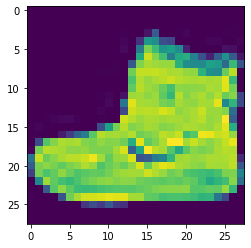

In [4]:
# plot images to make sure dataset is correct
plt.imshow(training_images[0])

In [5]:
# must reshape and normalize image
training_images = training_images.reshape(60000, 28, 28, 1) / 255.0
test_images = test_images.reshape(10000, 28, 28, 1) / 255.0


In [6]:
# create instance of the callback
callbacks = SimpleCallback()

In [7]:
# This time, the model has only one convolutional layer, but with twice the number of filters (128 vs 64)
# Dense layer was increased to 256
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape = (28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation ='relu'),
    tf.keras.layers.Dense(10, activation ='softmax')

])

In [8]:
# to the fit function, add callback object as an argument
# model stops before 20 epochs because it will reach 99% accuracy before then
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics =['accuracy'])
model.fit(training_images, training_labels, epochs = 20, callbacks = [callbacks])

Epoch 1/20
1875/1875 [==============================] - 20s 4ms/step - loss: 0.3553 - accuracy: 0.8727
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2370 - accuracy: 0.9120
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1864 - accuracy: 0.9297
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1465 - accuracy: 0.9447
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1159 - accuracy: 0.9564
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0911 - accuracy: 0.9656
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0725 - accuracy: 0.9727
Epoch 8/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0574 - accuracy: 0.9789
Epoch 9/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0443 - accuracy: 0.9843
Epoch 10/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.03

In [9]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.4630 - accuracy: 0.9158


[0.4629514217376709, 0.9157999753952026]

In [10]:
# make clone of previous model
model2 = tf.keras.models.clone_model(model)

In [11]:
# no callback this time, so all 20 epochs will occur
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics =['accuracy'])
history = model2.fit(training_images, training_labels, epochs = 20, validation_data = (test_images, test_labels))

Epoch 1/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3536 - accuracy: 0.8727 - val_loss: 0.2956 - val_accuracy: 0.8918
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2323 - accuracy: 0.9148 - val_loss: 0.2811 - val_accuracy: 0.9003
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1838 - accuracy: 0.9304 - val_loss: 0.2590 - val_accuracy: 0.9075
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1462 - accuracy: 0.9465 - val_loss: 0.2504 - val_accuracy: 0.9150
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1152 - accuracy: 0.9567 - val_loss: 0.2569 - val_accuracy: 0.9180
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0894 - accuracy: 0.9673 - val_loss: 0.2827 - val_accuracy: 0.9155
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0680 - accuracy: 0.9747 - val_loss: 0.3287 - val_accuracy:

In [12]:
# accuracy and loss data from model2
acc = history.history['accuracy']
lss = history.history['loss']
va = history.history['val_accuracy']
vl = history.history['val_loss']

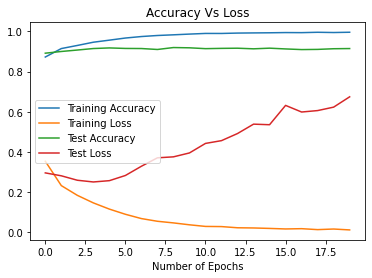

In [13]:
# plot results
plt.plot(acc, label='Training Accuracy')
plt.plot(lss, label='Training Loss')
plt.plot(va, label='Test Accuracy')
plt.plot(vl, label= "Test Loss")
plt.legend()
plt.title("Accuracy Vs Loss")
plt.xlabel("Number of Epochs")
plt.show()